## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools


Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout
def build_mlp(input_shape, output_units=10, num_neurons=[256, 128], drp_ratio=0.2):
    input_layer=keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i==0:
            x=keras.layers.Dense(units=n_units,activation='relu')(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x=keras.layers.Dense(units=n_units,activation='relu')(x)
            x = Dropout(drp_ratio)(x)
    out=keras.layers.Dense(units=output_units, activation="softmax")(x)
    
    model=keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.2,0.4,0.5,0.6]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for drop_ratio in Dropout_EXP:
    
    keras.backend.clear_session()
    print ('The dropout_ratio is : %.3f' % (drop_ratio))
    model=build_mlp(input_shape=x_train.shape[1:], drp_ratio=drop_ratio)
    
    optimizer=keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)
    
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "drop_ratio : %s" % str(drop_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0723 18:45:50.940721 10508 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0723 18:45:50.943733 10508 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0723 18:45:51.145692 10508 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0723 18:45:51.145692 10508 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0723 18:45:51.167674 10508 depr

The dropout_ratio is : 0.200


W0723 18:45:51.373902 10508 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0723 18:45:51.609521 10508 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 244us/step - loss: 2.0390 - acc: 0.2559 - val_loss: 1.8473 - val_acc: 0.3450
Epoch 2/50
50000/50000 [==============================] - 11s 223us/step - loss: 1.8531 - acc: 0.3307 - val_loss: 1.7248 - val_acc: 0.3850
Epoch 3/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.7837 - acc: 0.3609 - val_loss: 1.6822 - val_acc: 0.4028
Epoch 4/50
50000/50000 [==============================] - 11s 228us/step - loss: 1.7487 - acc: 0.3743 - val_loss: 1.6586 - val_acc: 0.4097
Epoch 5/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.7202 - acc: 0.3834 - val_loss: 1.6345 - val_acc: 0.4184
Epoch 6/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.6845 - acc: 0.3967 - val_loss: 1.6197 - val_acc: 0.4210
Epoch 7/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.6785 - acc: 0.3951 - val_loss: 1.

50000/50000 [==============================] - 11s 227us/step - loss: 2.0039 - acc: 0.2408 - val_loss: 1.9938 - val_acc: 0.2771
Epoch 17/50
50000/50000 [==============================] - 11s 226us/step - loss: 2.0022 - acc: 0.2420 - val_loss: 1.9629 - val_acc: 0.3048
Epoch 18/50
50000/50000 [==============================] - 11s 227us/step - loss: 2.0013 - acc: 0.2420 - val_loss: 1.9708 - val_acc: 0.3092
Epoch 19/50
50000/50000 [==============================] - 11s 227us/step - loss: 1.9991 - acc: 0.2449 - val_loss: 2.0120 - val_acc: 0.2767
Epoch 20/50
50000/50000 [==============================] - 11s 226us/step - loss: 1.9948 - acc: 0.2449 - val_loss: 1.9615 - val_acc: 0.3021
Epoch 21/50
50000/50000 [==============================] - 11s 226us/step - loss: 2.0028 - acc: 0.2430 - val_loss: 1.9813 - val_acc: 0.2867
Epoch 22/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.9930 - acc: 0.2454 - val_loss: 1.9734 - val_acc: 0.2901
Epoch 23/50
50000/50000 [=======

W0723 19:12:58.341340 10508 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.
W0723 19:12:58.406513 10508 nn_ops.py:4224] Large dropout rate: 0.6 (>0.5). In TensorFlow 2.x, dropout() uses dropout rate instead of keep_prob. Please ensure that this is intended.


The dropout_ratio is : 0.600
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 238us/step - loss: 2.2714 - acc: 0.1224 - val_loss: 2.1368 - val_acc: 0.1832
Epoch 2/50
50000/50000 [==============================] - 11s 227us/step - loss: 2.2231 - acc: 0.1269 - val_loss: 2.1314 - val_acc: 0.1873
Epoch 3/50
50000/50000 [==============================] - 11s 226us/step - loss: 2.2207 - acc: 0.1304 - val_loss: 2.1349 - val_acc: 0.1987
Epoch 4/50
50000/50000 [==============================] - 11s 223us/step - loss: 2.2131 - acc: 0.1331 - val_loss: 2.1486 - val_acc: 0.1979
Epoch 5/50
50000/50000 [==============================] - 11s 227us/step - loss: 2.2086 - acc: 0.1329 - val_loss: 2.0984 - val_acc: 0.1891
Epoch 6/50
50000/50000 [==============================] - 11s 225us/step - loss: 2.2109 - acc: 0.1349 - val_loss: 2.1196 - val_acc: 0.1883
Epoch 7/50
50000/50000 [==============================] - 11s 227us/step - loss: 2.2068

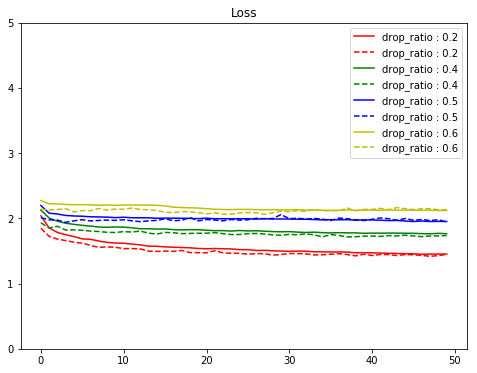

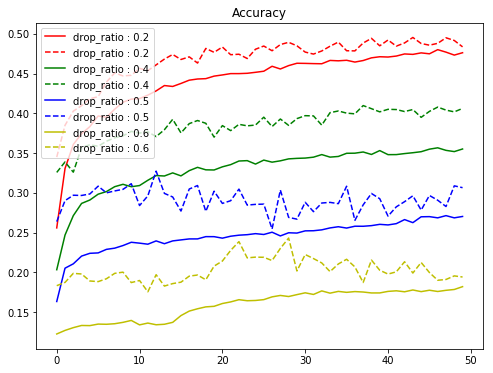

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()